# 图像增广

随机增强数据
训练的时候进行图像增强
测试的时候不用增强


In [1]:
%matplotlib inline
import torch
import torchvision
from torch import nn
from d2l import torch as d2l

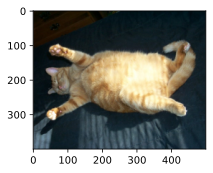

In [4]:
d2l.set_figsize()
img = d2l.Image.open('./data/cat1.jpg')
d2l.plt.imshow(img);

In [5]:
def apply(img, aug, num_rows=2, num_cols=4, scale=1.5):
    Y = [aug(img) for _ in range(num_rows * num_cols)]
    d2l.show_images(Y, num_rows, num_cols, scale=scale)

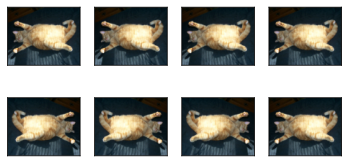

In [6]:
apply(img, torchvision.transforms.RandomHorizontalFlip()) # 随机向左向右反转

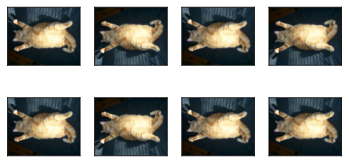

In [7]:
apply(img, torchvision.transforms.RandomVerticalFlip()) # 随机向上向下反转

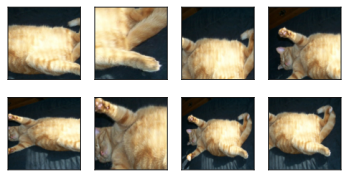

In [8]:
shape_aug = torchvision.transforms.RandomResizedCrop(
    (200, 200), scale=(0.1, 1), ratio=(0.5, 2)) # 拆下来10%~100%大小的图片，宽高比从0.5~2之间随机取值，然后宽高都被缩放到200像素
apply(img, shape_aug)

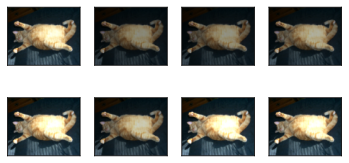

In [9]:
apply(img, torchvision.transforms.ColorJitter(
    brightness=0.5, contrast=0, saturation=0, hue=0)) # 亮度，对比度，饱和度，色调随机调整， 他会在原始图像上     （50%）到（150%）

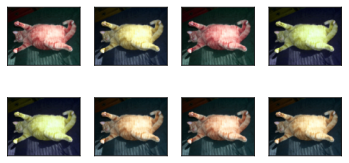

In [11]:
apply(img, torchvision.transforms.ColorJitter(
    brightness=0, contrast=0, saturation=0, hue=0.1)) # 这里就是 色调在 90% ~ 110%上应用

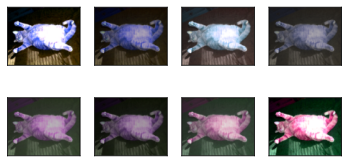

In [12]:
color_aug = torchvision.transforms.ColorJitter(
    brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)
apply(img, color_aug) # 所有东西都在（50%）到（150%）上浮动

# 微调⭐⭐⭐⭐⭐
我希望在我已经熟悉ImageNet的基础上
对我的物品进行识别
而不是重新开始

## How?
将ImageNet当中的权重复制一下
然后在ImageNet的基础之上 进行训练
![在这里插入图片描述](https://img-blog.csdnimg.cn/09d409c5a37148e6b63450a8d4886a81.png)

In [2]:
%matplotlib inline
import os
import torch
import torchvision
from torch import nn
from d2l import torch as d2l

In [3]:
d2l.DATA_HUB['hotdog'] = (d2l.DATA_URL + 'hotdog.zip',
                         'fba480ffa8aa7e0febbb511d181409f899b9baa5')

data_dir = d2l.download_extract('hotdog') # 下载数据集

In [4]:
train_imgs = torchvision.datasets.ImageFolder(os.path.join(data_dir,'train'))
test_imgs = torchvision.datasets.ImageFolder(os.path.join(data_dir,'test'))

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

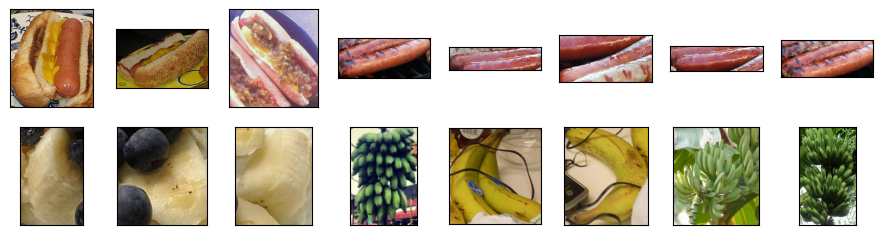

In [5]:
hotdogs = [train_imgs[i][0] for i in range(8)]
not_hotdogs = [train_imgs[-i - 1][0] for i in range(8)]
d2l.show_images(hotdogs + not_hotdogs, 2, 8, scale=1.4)

In [6]:
# 使用RGB通道的均值和标准差，以标准化每个通道
normalize = torchvision.transforms.Normalize(
    [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
# 结合多种图像增广方法
train_augs = torchvision.transforms.Compose([
    torchvision.transforms.RandomResizedCrop(224), # 随机裁剪
    torchvision.transforms.RandomHorizontalFlip(), # 随机左右反转
    torchvision.transforms.ToTensor(), # 转换成Tensor
    normalize]) # 使用RGB通道的均值和标准差，以标准化每个通道

test_augs = torchvision.transforms.Compose([
    torchvision.transforms.Resize([256, 256]),
    torchvision.transforms.CenterCrop(224),
    torchvision.transforms.ToTensor(),
    normalize])

In [7]:
pretrained_net = torchvision.models.resnet18(pretrained=True) # 获取到预训练的模型

C:\Users\狒狒\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\狒狒\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\狒狒/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100.0%


In [8]:
pretrained_net.fc

Linear(in_features=512, out_features=1000, bias=True)

In [9]:
finetune_net = torchvision.models.resnet18(pretrained=True)
finetune_net.fc = nn.Linear(finetune_net.fc.in_features, 2) # 这变成了2分类问题，所以最后一层全连接从1000个输出换成了2个输出。
nn.init.xavier_uniform_(finetune_net.fc.weight)

C:\Users\狒狒\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\狒狒\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Parameter containing:
tensor([[-0.0393, -0.0504,  0.0788,  ..., -0.0389, -0.0442,  0.0094],
        [ 0.0927, -0.0858, -0.0945,  ...,  0.0609,  0.0469,  0.0737]],
       requires_grad=True)


# 锚框
1. 机器提出来几个框框的区域
2. 预测每一个框框里面是否有关注的物体 （yes or not）
3. yes -> 锚框偏移 => 使得这个框框到更加真实的边缘框上

## 锚框和边缘框
+ 锚框：预测的框
+ 边缘框： 真实的框


# 交并比 - 衡量两个框之间的相似度
![在这里插入图片描述](https://img-blog.csdnimg.cn/3f9bbe85d2634d76802d183565eada1c.png)

# 赋予锚框标号
![在这里插入图片描述](https://img-blog.csdnimg.cn/50039115a8314a6b9415b404c58ac27d.png)
上面的这幅图在干什么？
+ 整个图片里面比如有 猫 狗 鸡 蛇 四个东西，代表的就是我的边缘框
+ 我要通过交并比

In [ ]:
# 疑问太多了。。。。
# 不太明白这是在干什么

# 13.5 多尺度目标检测
why?
锚框生成的太多了，需要减少一点

how?
多尺度锚框
+ 检测小的物品 => 多用几个小锚框
+ 检测大的物品 => 少用几个大锚框

In [1]:
%matplotlib inline
import torch
from d2l import torch as d2l

img = d2l.plt.imread('./data/catdog.jpg')
h, w = img.shape[:2]
h, w

(561, 728)

In [2]:
def display_anchors(fmap_w, fmap_h, s): # 显示锚框
    d2l.set_figsize()
    # 前两个维度上的值不影响输出
    fmap = torch.zeros((1, 10, fmap_h, fmap_w))
    anchors = d2l.multibox_prior(fmap, sizes=s, ratios=[1, 2, 0.5])
    bbox_scale = torch.tensor((w, h, w, h))
    d2l.show_bboxes(d2l.plt.imshow(img).axes,
                    anchors[0] * bbox_scale)

C:\Users\狒狒\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


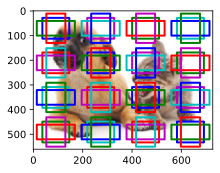

In [3]:
display_anchors(fmap_w=4, fmap_h=4, s=[0.15])

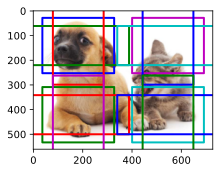

In [4]:
display_anchors(fmap_w=2, fmap_h=2, s=[0.4])

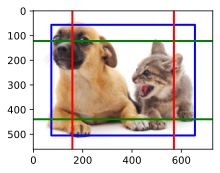

In [6]:
display_anchors(fmap_w=1, fmap_h=1, s=[0.8])

# 目标检测数据集

In [9]:
%matplotlib inline
import os
import pandas as pd
import torch
import torchvision
from d2l import torch as d2l

#@save
d2l.DATA_HUB['banana-detection'] = (
    d2l.DATA_URL + 'banana-detection.zip',
    '5de26c8fce5ccdea9f91267273464dc968d20d72')

In [14]:
#@save
def read_data_bananas(is_train=True):
    """读取香蕉检测数据集中的图像和标签"""
    data_dir = d2l.download_extract('banana-detection')
    csv_fname = os.path.join(data_dir, 'bananas_train' if is_train
                             else 'bananas_val', 'label.csv')
    csv_data = pd.read_csv(csv_fname)
    csv_data = csv_data.set_index('img_name')
    images, targets = [], []
    for img_name, target in csv_data.iterrows():
        images.append(torchvision.io.read_image(
            os.path.join(data_dir, 'bananas_train' if is_train else
                         'bananas_val', 'images', f'{img_name}')))
        # 这里的target包含（类别，左上角x，左上角y，右下角x，右下角y），
        # 其中所有图像都具有相同的香蕉类（索引为0）
        targets.append(list(target))
    return images, torch.tensor(targets).unsqueeze(1) / 256

In [15]:
#@save
class BananasDataset(torch.utils.data.Dataset):
    """一个用于加载香蕉检测数据集的自定义数据集"""
    def __init__(self, is_train):
        self.features, self.labels = read_data_bananas(is_train)
        print('read ' + str(len(self.features)) + (f' training examples' if
              is_train else f' validation examples'))

    def __getitem__(self, idx):
        return (self.features[idx].float(), self.labels[idx])

    def __len__(self):
        return len(self.features)

In [16]:
#@save
def load_data_bananas(batch_size):
    """加载香蕉检测数据集"""
    train_iter = torch.utils.data.DataLoader(BananasDataset(is_train=True),
                                             batch_size, shuffle=True)
    val_iter = torch.utils.data.DataLoader(BananasDataset(is_train=False),
                                           batch_size)
    return train_iter, val_iter

In [17]:
batch_size, edge_size = 32, 256
train_iter, _ = load_data_bananas(batch_size)
batch = next(iter(train_iter))
batch[0].shape, batch[1].shape

read 1000 training examples
read 100 validation examples


(torch.Size([32, 3, 256, 256]), torch.Size([32, 1, 5]))

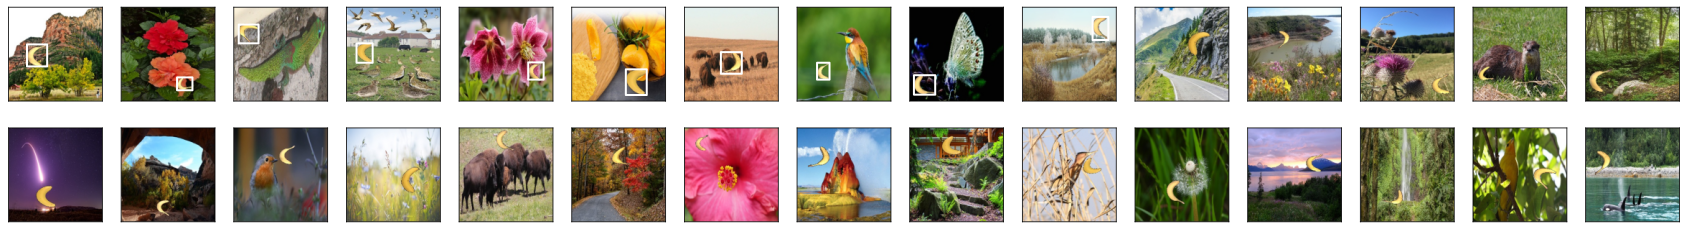

In [21]:
imgs = (batch[0][0:30].permute(0, 2, 3, 1)) / 255
axes = d2l.show_images(imgs, 2, 15, scale=2)
for ax, label in zip(axes, batch[1][0:10]):
    d2l.show_bboxes(ax, [label[0][1:5] * edge_size], colors=['w'])

# SSD
底部去看小物体，顶部去看大物体
+ 底部的时候 是一整个图， 锚框小点 可以看到小的物体
+ 顶部已经经过了卷积层，图片变小了，这个时候，就可以看到大的物体

[见到的一个比较easy的实现视频](https://www.bilibili.com/video/BV1oY411s7Bk?p=4&spm_id_from=pageDriver&vd_source=be08cd9cc4a3d6f3fec83590352fca21)

[原仓库](https://github.com/lansinuote/SSD_Object_Detection

代码见： 皮卡丘学SSD

# 语义分割
更加精细化，像素级的分割
应用：
+ 背景虚化
+ 路面分割

In [ ]:
%matplotlib inline
import os
import torch
import torchvision
from d2l import torch as d2l